In [1]:
import matplotlib.pyplot as plt
import numpy as np
import psutil
from joblib import Parallel, delayed
from ripser import Rips

In [2]:
def n_H1(epsilon, n_point):
    Bin = np.arange(0, 2 + epsilon, epsilon)
    x = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], n_point).T
    x_n = x / np.linalg.norm(x, axis=0)
    diagrams = rips.fit_transform(x_n.T)
    if len(diagrams[1]) == 0:
        return np.zeros_like(Bin)
    elif len(diagrams[1]) > 1:
        return None
    else:
        result = np.zeros_like(Bin)
        _tmp = np.digitize(diagrams[1][0], Bin)
        result[_tmp[0]: _tmp[1]] = 1
        return result

In [3]:
n_cpu = psutil.cpu_count()
rips = Rips()

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


In [4]:
result = []
Epsilon = 0.01
n_trials = 10 ** 5
for n_points in range(4, 20):
    print(n_points, end=' ')
    A = Parallel(n_jobs=n_cpu, verbose=0)(
        delayed(n_H1)(Epsilon, n_points) for i in range(n_trials)
    )
    final_result = sum(A) / n_trials
    result.append(final_result)
    # plt.title(n_points)
    # plt.plot(np.arange(0, 2 + Epsilon, Epsilon), final_result)
    # plt.tight_layout()
    # plt.show()
    # plt.close()
result = np.asarray(result)

4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 

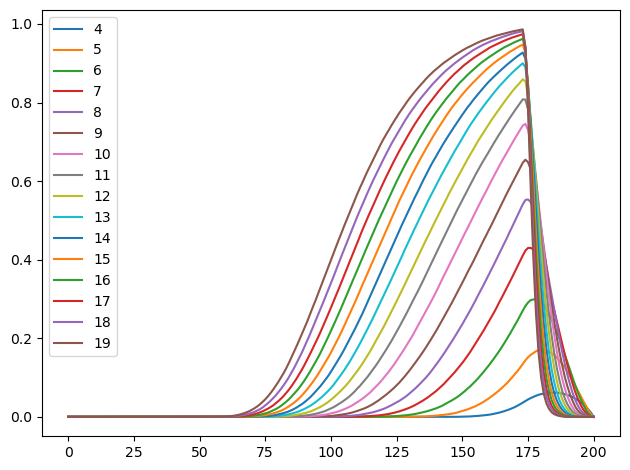

In [5]:
for el, label in zip(result, range(4, 20)):
    plt.plot(el, label=label)
plt.legend()
plt.tight_layout()
plt.show()
plt.close()

In [6]:
np.save('result.npy', result)